# Jupyter Notebook UI to graph your TAP data!

Version 1.7 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png
4. Added tap-correction function for missing taps (should be working now)
5. Added plate column to evaluate plate-discrepancies
6. Added separate graphing function for plate-discrepancies
7. Added colour palette-setting function

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not need input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button from output)

Run the following cell and click the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
### Select Folder App - After you run, you can select your folder for filepath
button = widgets.Button(description = 'Select Folder') #<- Creates a button variable
display(button) #<- displays this button on output
def select_folder(b): #<- This is an action. Requires a variable, so I put in an arbitrary one 'b'
    global folder_path #<- sets a variable as a global variable, not just within this action
    Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
    folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
    Tk().update()#<- below
    Tk().destroy()#<- this and the line above it removes the file explorer window after a selection is made
    print(folder_path) #<- this helps confirm that this action was performed
    print('done step 2')
button.on_click(select_folder) #<- describes what happens when you click on this button

Button(description='Select Folder', style=ButtonStyle())

C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16
done step 2


# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

3.1: Number of taps is pretty self-explanatory. How any taps does your experiment have? put in that number + 1 (N+1)!

This may be a bit confusing, but this is due to some coding syntax that you don't have to worry about.

3.2: Change your ISI number. This will be reflected in the name/title of the output figure.

In [3]:

number_of_taps = 30 ###<------ Taps in your experiment.

number_taps = range(1, number_of_taps + 1)  #<- do not change this


# if you have different ISIs in the same folder, then come back and change this 
# when you are graphing for the second set of data with the other ISI 
# (Generally data from same ISIs are graphed together)
# If changing ISI mid-analysis, you can just skip straight to step 8 after running this cell again

ISI = 10  ### <- What is your ISI? change accordingly
first_tap = 600 ### <- when is your first tap? check your TRV files

#Here, open up one of the trv files to determine the times for each of these taps. 
lower = np.arange(first_tap-1, first_tap-1+(number_of_taps*ISI), ISI) #(first tap, last tap+10s, ISI)
upper = np.arange(first_tap+1, first_tap+1+(number_of_taps*ISI), ISI) #(first tap, last tap+10s, ISI)
tolerances = list(zip(lower, upper)) 
taps = [i for i in range(1,number_of_taps+1)]

#assign each tolerance to a tap number

accurate_taps = list((zip(taps, tolerances)))
print(accurate_taps)

for pair in accurate_taps:
   tap = pair[0]
   tolerance = pair[1]
   #print("tap "+str(tap), "tolerance="+str(tolerance))

print("done step 3")

[(1, (599, 601)), (2, (609, 611)), (3, (619, 621)), (4, (629, 631)), (5, (639, 641)), (6, (649, 651)), (7, (659, 661)), (8, (669, 671)), (9, (679, 681)), (10, (689, 691)), (11, (699, 701)), (12, (709, 711)), (13, (719, 721)), (14, (729, 731)), (15, (739, 741)), (16, (749, 751)), (17, (759, 761)), (18, (769, 771)), (19, (779, 781)), (20, (789, 791)), (21, (799, 801)), (22, (809, 811)), (23, (819, 821)), (24, (829, 831)), (25, (839, 841)), (26, (849, 851)), (27, (859, 861)), (28, (869, 871)), (29, (879, 881)), (30, (889, 891))]
done step 3


# 4. Constructing Filelist From Source File/Select File (Just run)

In [4]:
#folder_path = '/Users/Joseph/Desktop/AVR14_10sISI' #- manual folder path if Tkinter is acting up

os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.trv'): #<- and takes out all files with a .trv (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

['C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16\\N2NEW\\20210216_142149\\N2NEW_5x4_t96h20C_600s30x10s_B_2021_02_16C.trv', 'C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16\\N2NEW\\20210216_142735\\N2NEW_5x4_t96h20C_600s30x10s_A_2021_02_16A.trv', 'C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16\\N2NEW\\20210216_143950\\N2NEW_5x4_t96h20C_600s30x10s_C_2021_02_16E.trv', 'C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16\\N2NEW\\20210216_144542\\N2NEW_5x4_t96h20C_600s30x10s_B_2021_02_16D.trv', 'C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16\\N2NEW\\20210216_144601\\N2NEW_5x4_t96h20C_600s30x10s_A_2021_02_16B.trv', 'C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16\\N2NEW\\20210216_150048\\N2NEW_5x4_t96h20C_600s30x10s_C_2021_02_16F.trv', 'C:/Users/Joshk/OneDrive/Documents Backup/Documents/Rankin_Lab/2021_02_16\\N2NEW\\20210216_154316\\N2NEW_5x4_t9

# 5. Process Data Function (Just Run)

In [5]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = [x for x in filelist if strain in x] #<- goes through the list and filters for keyword
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    Plate_N = 1
    print(f'this strain/treatment has {Strain_N} plates') #<- will output as the first number
    if Strain_N == 0:
        raise AssertionError ('{} is not a good identifier'.format(strain))
    else:
        pass
#     for f in strain_filelist:
#         DF_Total = pd.concat(pd.read_csv(f, sep=' ', skiprows = 4, header = None))
        DF_Total = pd.concat([pd.read_csv(f, sep=' ', skiprows = 4, header = None) for f in strain_filelist],
                      ignore_index=True) #<- imports your data files
        DF_Total = DF_Total.dropna(axis = 1) #<- cleans your data
        DF_Total = DF_Total.rename( #<- more cleaning
                    {0:'time',
                    2:'rev_before',
                    3:'no_rev',
                    4:'stim_rev',
                    7:'dist',
                    8:'dist_std',
                    9:'dist_stderr',
                    11:'dist_0th',
                    12:'dist_1st',
                    13:'dist_2nd',
                    14:'dist_3rd',
                    15:'dist_100th',
                    18:'dura',
                    19:'dura_std',
                    20:'dura_stderr',
                    22:'dura_0th',
                    23:'dura_1st',
                    24:'dura_2nd',
                    25:'dura_3rd',
                    26:'dura_100th'}, axis=1)
        #check function here for NaN Columns
        DF_Total['plate'] = 0
        DF_Total['prob'] = DF_Total['stim_rev']/ (DF_Total['no_rev'] + DF_Total['stim_rev']) #<- calculate prob
        DF_Total['speed'] = DF_Total['dist']/DF_Total['dura'] #<- calculate speed
        DF_Total_rows = int(DF_Total.shape[0])
        print(f'this strain/treatment has {DF_Total_rows} total taps') #<- Outputs as the second number. Check if you are missing taps!
        DF_Final = DF_Total[["time", "dura", "dist", "prob", "speed", "plate"]].copy()

    return{
            'N': Strain_N,
            'Confirm':DF_Total,
            'Final': DF_Final}
    print('done!')



def assign_taps(DF, tolerances):
    DF['taps'] = ""
    for taps, tolerance in enumerate(tolerances): #[(99, 101), (109,111), ...]
        tap_lower,tap_upper = tolerance
        TimesInTapRange = DF['time'].between(tap_lower,tap_upper, inclusive=True)
        DF.loc[TimesInTapRange,'taps'] = taps+1 #set the tap to i where times are between



    
def insert_plates(df):   
    """This function inserts a plate column into a dataframe.
    
    :param df: any dataframe
    :type: pandas.core.frame.DataFrame
    
    :return: dataframe with a plate column
    :type: pandas.core.frame.DataFrame
    """
    df['plate']=(df['taps'] ==1).cumsum()


            
print('done step 5')

done step 5


# 6.1 Process Data (PLEASE READ, Add input here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the overall folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

## Depending on how many strains you are running for comparison, you may need to add/delete some lines!

## You are not naming your data groups here, we have a step for that later!
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [6]:
#Format: 'Strain_#'' = 'unique_identifier'

### Make into dictionary
StrainNames = {
    'Strain_1' : 'N2NEW',  #<- each strain will be designated to a unique identifier here
    'Strain_2' : 'N2OLD',
 #   'Strain_3' : 'MEC7C1',
 #   'Strain_4' : 'MEC7C2',
 #   'Strain_5' : 'MEC7C5',
 #   'Strain_6' : '',
 #   'Strain_7' : '', #<- empty entries are for those hardcore trackers that tracks this many strains
 #   'Strain_8' : '',
 #   'Strain_9' : '',
 #   'Strain_10' : '',
 #   'Strain_11' : '',
 #   'Strain_12' : '',
 #   'Strain_13' : '',
 #   'Strain_14' : '',
 #   'Strain_15' : '',
}
#...etc, etc

print('done step 6.1')

done step 6.1


# 6.2 Process Data (just run this cell)

In [7]:
DataLists = [0]  #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in StrainNames.values(): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Final']) #<- appends all data into a list of dataframes


for df in DataLists[1:]: 
    assign_taps(df, tolerances)
for df in DataLists[1:]:    
    insert_plates(df)

# print(x)
print(DataLists[2])
print(len(DataLists))        
print('done step 6.2')

this strain/treatment has 10 plates
this strain/treatment has 300 total taps
this strain/treatment has 10 plates
this strain/treatment has 300 total taps
        time  dura   dist      prob     speed  plate taps
0    599.998  3.53  0.840  0.952381  0.237960      1    1
1    609.995  2.87  0.636  0.880952  0.221603      1    2
2    619.918  2.26  0.512  0.764706  0.226549      1    3
3    629.999  1.89  0.417  0.734694  0.220635      1    4
4    639.962  1.55  0.323  0.576271  0.208387      1    5
..       ...   ...    ...       ...       ...    ...  ...
295  849.971  1.19  0.252  0.250000  0.211765     10   26
296  859.985  0.19  0.034  0.240000  0.178947     10   27
297  869.957  0.47  0.090  0.347826  0.191489     10   28
298  879.975  0.68  0.110  0.384615  0.161765     10   29
299  889.970  1.65  0.392  0.263158  0.237576     10   30

[300 rows x 7 columns]
3
done step 6.2


# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is N2.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [8]:
TotalConcatenated = pd.concat([ #<- this function joins your data together with an extra column for which group 
                          DataLists[1].assign(dataset = StrainNames.get("N2_new_plate")), 
                          DataLists[2].assign(dataset = StrainNames.get("N2_old_plate")),
                        #  DataLists[3].assign(dataset = StrainNames.get("Strain_3")),
                         # DataLists[4].assign(dataset = StrainNames.get("Strain_4")),
                         # DataLists[5].assign(dataset = StrainNames.get("Strain_5")),
                          
])
# ...etc etc

TotalConcatenated.reset_index(inplace=False)
print(TotalConcatenated)

#if TotalConcatenated["taps"].loc[ind] is not 1:
#   TotalConcatenated["taps"].loc[ind:indices[c+1]] = list(range(1,len(TotalConcatenated["taps"].loc[ind:indices[c+1]])+1))
# missing_taps(TotalConcatenated, accurate_taps, tolerances)

print('done step 7')

        time  dura   dist      prob     speed  plate taps dataset
0    599.992  2.49  0.430  0.894737  0.172691      1    1    None
1    609.956  2.65  0.449  0.777778  0.169434      1    2    None
2    619.916  2.39  0.472  0.764706  0.197490      1    3    None
3    629.996  2.83  0.523  0.650000  0.184806      1    4    None
4    639.918  1.72  0.272  0.600000  0.158140      1    5    None
..       ...   ...    ...       ...       ...    ...  ...     ...
295  849.971  1.19  0.252  0.250000  0.211765     10   26    None
296  859.985  0.19  0.034  0.240000  0.178947     10   27    None
297  869.957  0.47  0.090  0.347826  0.191489     10   28    None
298  879.975  0.68  0.110  0.384615  0.161765     10   29    None
299  889.970  1.65  0.392  0.263158  0.237576     10   30    None

[600 rows x 8 columns]
done step 7


# Setting Colour Palette - Only run the below cell ONCE

The following code sets the colour palette for the whole experiment - and then designate one colour to each strain. After this, if as you are graphing you take away some strains, you can do so with the colours still matching accordingly.

In [9]:
strains = TotalConcatenated['dataset'].unique()
pal = dict(zip(strains, sns.color_palette("deep", n_colors=len(strains))))
print('palette is:' + str(pal))
print('done setting colour palette')

palette is:{None: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)}
done setting colour palette


# 7.5: BONUS - Graph by plates to check for anomolies across each strain/treatment

Here, we will be graphing each strain on their own by their individual plates - this will help us find any anomolies or outliers that we can then exclude!


In [14]:
Strain1_pal = sns.choose_colorbrewer_palette('sequential')
# Strain2_pal = sns.choose_colorbrewer_palette('sequential')
# Strain3_pal = sns.choose_colorbrewer_palette('sequential')
# Strain4_pal = sns.choose_colorbrewer_palette('sequential')
# Strain5_pal = sns.choose_colorbrewer_palette('sequential')
# Strain6_pal = sns.choose_colorbrewer_palette('sequential')
# Strain7_pal = sns.choose_colorbrewer_palette('sequential')
# Strain8_pal = sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

<Figure size 432x288 with 0 Axes>

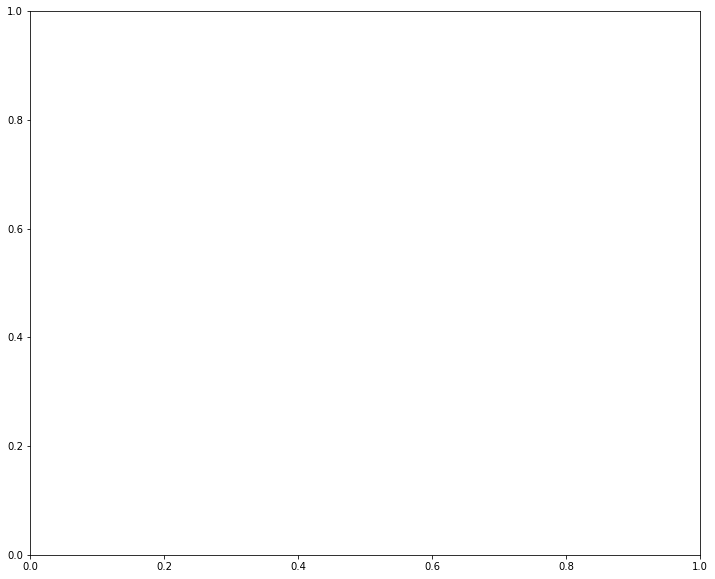

<Figure size 432x288 with 0 Axes>

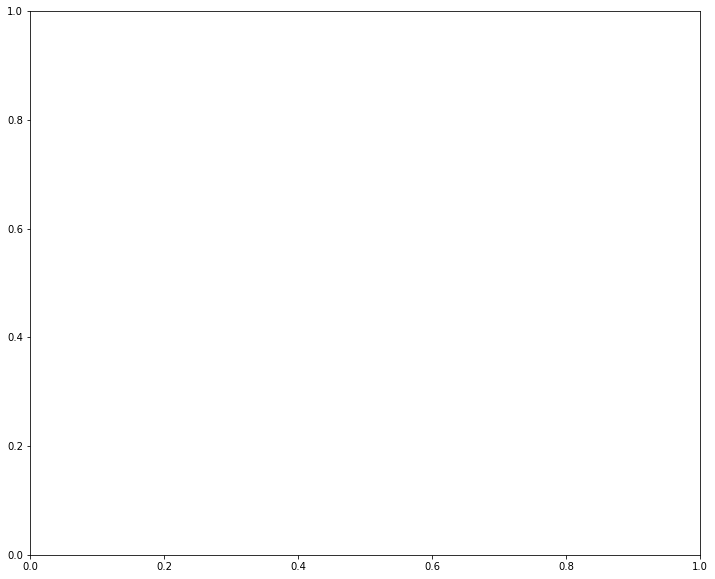

<Figure size 432x288 with 0 Axes>

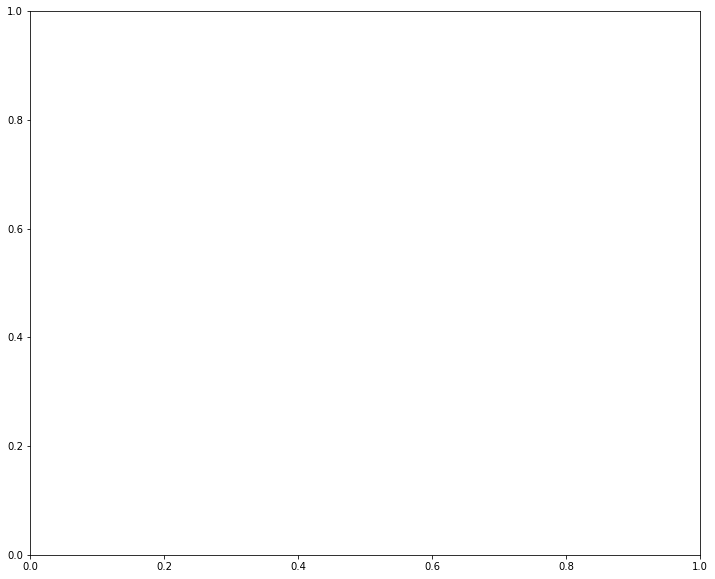

<Figure size 432x288 with 0 Axes>

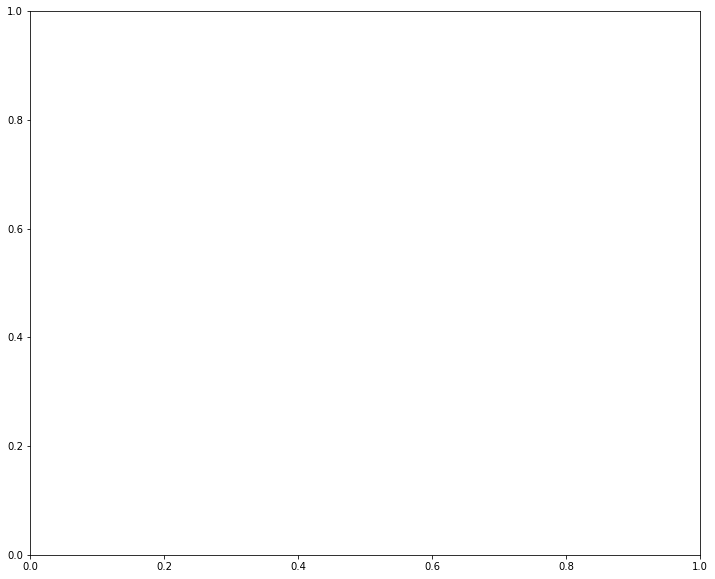

In [15]:
StrainConcatenated = TotalConcatenated[
    TotalConcatenated.dataset == StrainNames.get("N2_new_plate")] #Change/dictate which strain you are analyzing
StrainName = StrainNames.get("N2_new_plate") #Also change this, for labeling purposes


out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})

# Probability
with out1:
    plt.figure(linewidth = 2.5) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(12,10)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.pointplot(x="taps", #<- Here we use seaborn as our graphing package. 
                 y="prob",  
                 data = StrainConcatenated,
                 hue = 'plate', #<- Here we use the extra column from step 6 to separate by group
                 palette = Strain1_pal, #<- Change colour palette here if you like
                 ci = 95) #<- Confidence interval. 95 = standard error
    plt.xlabel("Taps") #<- X-axis title
    plt.ylabel("Probability") #<- Y-Axis title
    plt.title(f"{StrainName} Probability of Tap Habituation, {ISI}ISI") #<- Figure Title
    plt.ylim(0,1)
    ax.legend(loc = 'upper right', fontsize = '12') #<- location of your legend
#     plt.savefig(f'{StrainName}_Probability_{ISI}ISI_ByPlate.png', format='png', dpi=900) #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dist", 
                 data = StrainConcatenated,
                 hue = 'plate',
                 palette = Strain1_pal,
                 ci = 95)
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Distance", fontsize = '12')
    plt.title(f"{StrainName} Distance of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,1.5)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'{StrainName}_Distance_{ISI}ISI_ByPlate.png', format='png', dpi=900)
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dura", 
                 data = StrainConcatenated,
                 hue = 'plate',
                 palette = Strain1_pal,
                 ci = 95)
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Duration", fontsize = '12')
    plt.title(f"{StrainName} Duration of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,3)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'{StrainName}_Duration_{ISI}ISI_ByPlate.png', format='png', dpi=900)
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="speed", 
                 data = StrainConcatenated,
                 hue = 'plate',
                 palette = Strain1_pal,
                 ci = 95)
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Speed", fontsize = '12')
    plt.title(f"{StrainName} Speed of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,0.5)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=900)
    plt.show()

# 8. Graph Data (Probability, Distance, Duration, Speed of Tap Habituation)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data!

Note: It has been agreed by the lab that distance is quite an outdated measure, and the three top measures we consider are:

## probability, duration and speed.

<Figure size 432x288 with 0 Axes>

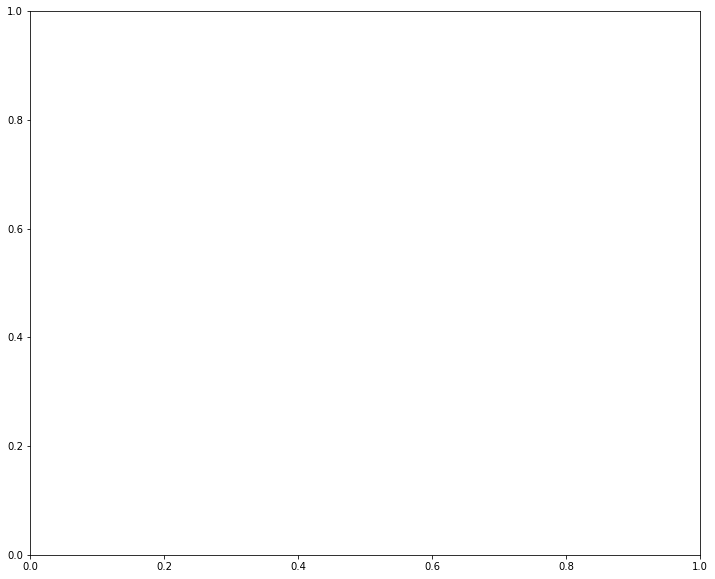

<Figure size 432x288 with 0 Axes>

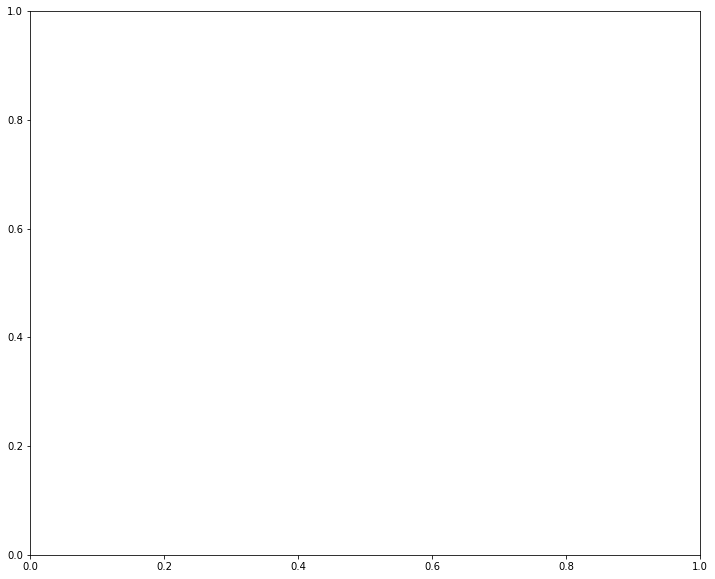

<Figure size 432x288 with 0 Axes>

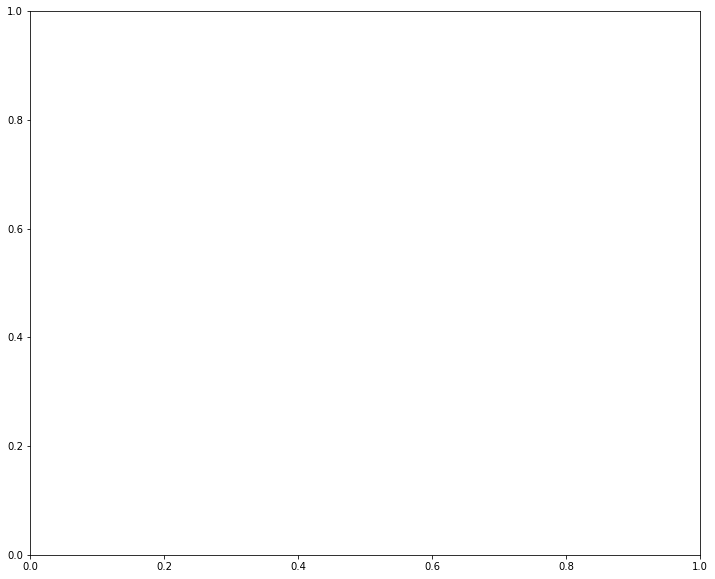

<Figure size 432x288 with 0 Axes>

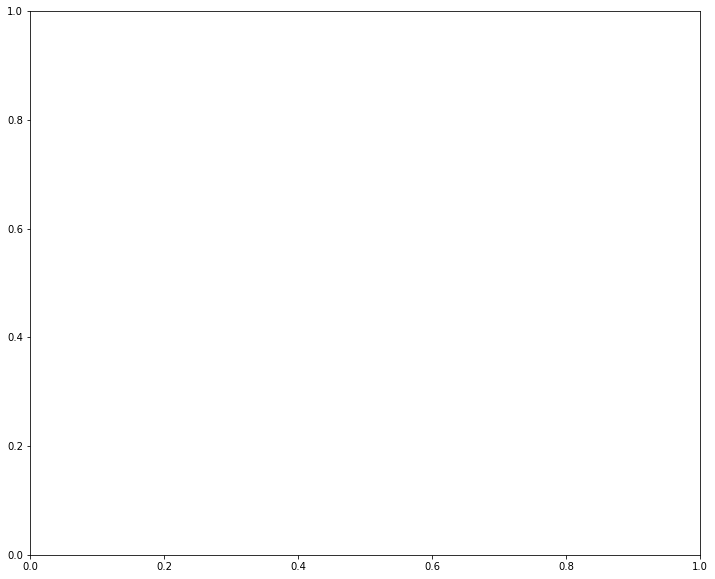

In [13]:
out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})

# Probability
with out1:
    plt.figure(linewidth = 2.5) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(12,10)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.pointplot(x="taps", #<- Here we use seaborn as our graphing package. 
                 y="prob",  
                 data = TotalConcatenated,
                 hue = 'dataset', #<- Here we use the extra column from step 6 to separate by group
                 palette = pal, #<- Change colour palette here if you like
                 ci = 95) #<- Confidence interval. 95 = standard error
    plt.xlabel("Taps") #<- X-axis title
    plt.ylabel("Probability") #<- Y-Axis title
    plt.title(f"Probability of Tap Habituation, {ISI}ISI") #<- Figure Title
    plt.ylim(0,1)
    ax.legend(loc = 'upper right', fontsize = '12') #<- location of your legend
#     plt.savefig(f'Probability_{ISI}ISI.png', format='png', dpi=900) #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dist", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = pal,
                 ci = 68  #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Distance", fontsize = '12')
    plt.title(f"Distance of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Distance_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dura", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = pal,
                 ci = 68  #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Duration", fontsize = '12')
    plt.title(f"Duration of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Duration_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="speed", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = pal,
                 ci = 68 #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Speed", fontsize = '12')
    plt.title(f"Speed of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Speed_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Done!